# 🧾 Excel Report Automation with Python

This notebook demonstrates how to automate the generation of a sales performance report from messy Excel data. The report includes data cleaning, KPI generation, summaries, and a multi-sheet Excel export with formatting.

**Tasks Covered:**
- Load and inspect messy data
- Clean and preprocess the dataset
- Generate KPIs and summaries
- Export a formatted Excel report


In [18]:
# importing libraries

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
# Loading the dataset

df= pd.read_excel('data/raw_sales_data.xlsx')

# Displaying the first 5 rows of the dataset
df.head()

,Order ID,Date,Customer Segment,Category,Sub-Category,Product Name,Region,Sales,Profit
0,ORD-1524,2025-01-31,Home Office,Office Supplies,Paper,Same Paper,East,147.46,-16.34
1,ORD-1603,2024-03-17,Corporate,Technology,Phones,Dream Phones,South,862.02,190.81
2,ORD-1527,2023-09-13,Consumer,Office Supplies,Paper,Support Paper,Central,401.35,-99.26
3,ORD-1032,2024-07-31,Corporate,Office Supplies,Labels,Machine Labels,South,950.89,328.88
4,ORD-1617,2023-11-01,Home Office,Office Supplies,Binders,Grow Binders,East,257.04,89.14


### Initial Exploration

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          1018 non-null   object        
 1   Date              1018 non-null   datetime64[ns]
 2   Customer Segment  1018 non-null   object        
 3   Category          1018 non-null   object        
 4   Sub-Category      1018 non-null   object        
 5   Product Name      1018 non-null   object        
 6   Region            1018 non-null   object        
 7   Sales             972 non-null    float64       
 8   Profit            921 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 71.8+ KB


In [33]:
df.describe()

,Date,Sales,Profit
count,1018,972.000000,921.000000
mean,2024-06-12 16:18:51.630648320,520.525123,55.429262
min,2023-06-11 00:00:00,11.350000,-272.680000
25%,2023-12-15 00:00:00,272.392500,-23.020000
50%,2024-06-12 00:00:00,537.225000,33.730000
75%,2024-12-10 00:00:00,757.977500,126.530000
max,2025-06-10 00:00:00,999.930000,489.710000
std,NaN,280.534137,134.633814


In [34]:
df.isnull().sum()

Order ID             2
Date                 2
Customer Segment     2
Category             2
Sub-Category         2
Product Name         2
Region               2
Sales               48
Profit              99
dtype: int64

In [35]:
df.duplicated().sum()

21

### Data Cleaning Steps
- Remove blank rows
- Drop duplicates
- Handle missing values in Sales and Profit

In [36]:
# Drop completely empty rows
df.dropna(how='all', inplace=True)

df.isnull().sum()

Order ID             0
Date                 0
Customer Segment     0
Category             0
Sub-Category         0
Product Name         0
Region               0
Sales               46
Profit              97
dtype: int64

In [37]:
# Remove Duplicate Rows

df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [39]:
# Fill missing sales and profit values with their mean

# Fill missing values in 'Sales' column with the mean of the column
df['Sales'].fillna(df['Sales'].mean())


# Fill missing values in 'Profit' column with the mean of the column
df['Profit'].fillna(df['Profit'].mean())

# Check if there are any missing values left

df.isnull().sum()

Order ID            0
Date                0
Customer Segment    0
Category            0
Sub-Category        0
Product Name        0
Region              0
Sales               0
Profit              0
dtype: int64

In [41]:
# convert the 'Order Date' column to datetime format

df['Date']=pd.to_datetime(df['Date'], format='%d%m/%Y')

df.head()

,Order ID,Date,Customer Segment,Category,Sub-Category,Product Name,Region,Sales,Profit
0,ORD-1524,2025-01-31,Home Office,Office Supplies,Paper,Same Paper,East,147.46,-16.34
1,ORD-1603,2024-03-17,Corporate,Technology,Phones,Dream Phones,South,862.02,190.81
2,ORD-1527,2023-09-13,Consumer,Office Supplies,Paper,Support Paper,Central,401.35,-99.26
3,ORD-1032,2024-07-31,Corporate,Office Supplies,Labels,Machine Labels,South,950.89,328.88
4,ORD-1617,2023-11-01,Home Office,Office Supplies,Binders,Grow Binders,East,257.04,89.14


### Generate KPIs and Summaries

In [56]:
# Generate KPIs

total_sales = round(df['Sales'].sum(), 2)
total_profit = round(df['Profit'].sum(),2)
total_orders = df['Order ID'].count()
average_order_value = total_sales / total_orders
average_profit_margin = (total_profit / total_sales) * 100


# Summarize by region
region_summary= round(df.groupby('Region')[['Sales','Profit']].sum().reset_index(),2)

# Top 7 Products by Sales

# Correct way to define it
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(7).reset_index()

# Print KPIs and Summaries

print(f"Total Sales:{total_sales}")
print(f"Total Profit:{total_profit}")
print(f"Total Orders:{total_orders}")

print("----------------- \n")

print(region_summary)

print("----------------- \n")
print(top_products)

Total Sales:519368.61
Total Profit:55013.26
Total Orders:998
----------------- 

    Region      Sales    Profit
0  Central   93059.79   8021.06
1     East  109462.64  11646.61
2    North  103573.20   9120.91
3    South   99368.96  11095.01
4     West  113904.02  15129.67
----------------- 

        Product Name    Sales
0   Industry Binders  1897.71
1        Low Laptops  1878.22
2       Four Binders  1751.07
3       Right Labels  1749.06
4         We Laptops  1744.58
5  Direction Binders  1644.17
6     Machine Labels  1585.03


### Export Report to Excel

In [66]:
from datetime import datetime

timestamp = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
report_path = f'data/sales_report_{timestamp}.xlsx'

with pd.ExcelWriter(report_path, engine='xlsxwriter') as writer:
    # Write sheets
    df.to_excel(writer, index=False, sheet_name='Cleaned Data')
    region_summary.to_excel(writer, index=False, sheet_name='Region Summary')
    top_products.to_excel(writer, index=False, sheet_name='Top Products')

    # KPI Sheet
    pd.DataFrame({
        'Metric': ['Total Sales', 'Total Profit', 'Total Orders'],
        'Value': [total_sales, total_profit, total_orders]
    }).to_excel(writer, index=False, sheet_name='KPIs')

    # Access workbook and formatting
    workbook = writer.book
    currency_fmt = workbook.add_format({'num_format': '$#,##0.00', 'bold': True})

    # Apply formatting to numeric columns
    for sheet in ['Region Summary', 'Top Products', 'KPIs']:
        worksheet = writer.sheets[sheet]
        worksheet.set_column('B:B', 18, currency_fmt)

    # ➕ Insert column chart into Region Summary sheet
    worksheet = writer.sheets['Region Summary']
    chart = workbook.add_chart({'type': 'column'})

    chart.add_series({
        'name': 'Sales by Region',
        'categories': ['Region Summary', 1, 0, len(region_summary), 0],
        'values': ['Region Summary', 1, 1, len(region_summary), 1],
    })

    chart.set_title({'name': 'Sales by Region'})
    chart.set_x_axis({'name': 'Region'})
    chart.set_y_axis({
        'name': 'Sales ($)',
        'major_unit': 500  # Spacing on Y-axis set to 500
    })
    chart.set_style(11)
    worksheet.insert_chart('E2', chart)

    # ➕ Insert bar chart into Top Products sheet
    worksheet = writer.sheets['Top Products']
    chart = workbook.add_chart({'type': 'column'})

    chart.add_series({
        'name': 'Top Products',
        'categories': ['Top Products', 1, 0, len(top_products), 0],
        'values': ['Top Products', 1, 1, len(top_products), 1],
    })

    chart.set_title({'name': 'Top Products by Sales'})
    chart.set_x_axis({'name': 'Product Name'})
    chart.set_y_axis({
        'name': 'Sales ($)',
        'major_unit': 500  # Spacing on Y-axis set to 500
    })
    chart.set_style(11)
    worksheet.insert_chart('E2', chart)

print(f"✅ Report saved to: {report_path}")


✅ Report saved to: data/sales_report_2025-06-12_00-15-31.xlsx


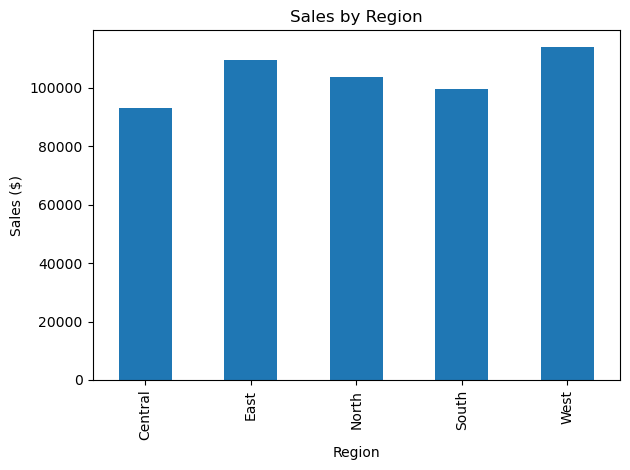

In [58]:
region_summary.plot(kind='bar', x='Region', y='Sales', legend=False, title='Sales by Region')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()


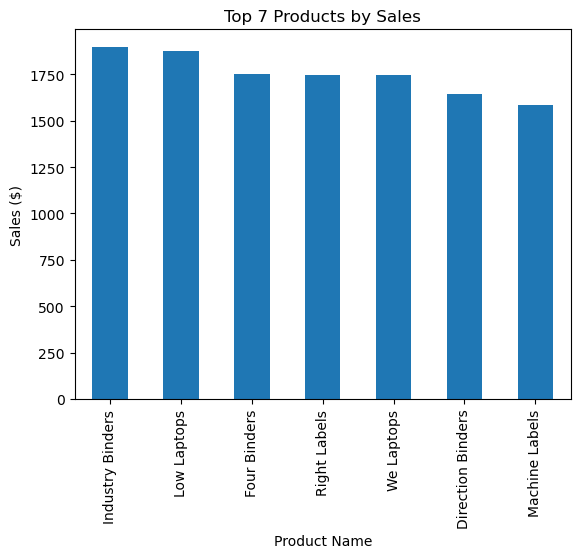

In [59]:
top_products.plot(kind='bar', x='Product Name', y='Sales', legend=False, title='Top 7 Products by Sales')
plt.ylabel('Sales ($)')     
plt.show()